## Clasificador 

In [129]:
#Import libraries
import numpy as np
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [130]:
n = 100000 #Tamaño de muestra

muestra = np.zeros((n,3))

#### Toma de muestra

In [131]:
for i in range(n):
    
    clase = np.random.randint( 0 , 1 + 1 ) #Uniforme discreta en {0,1}
    y = np.random.uniform(0,1)
    
    muestra[i][2] = clase
    muestra[i][1] = y
    muestra[i][0] = y * np.random.uniform(-1/2, 1/2)+1/2 if clase else (1-y)* np.random.uniform(-1/2,1/2)+1/2

#### Simulación de la distribución sobre el triangulo con base en y=1

In [132]:
clase0 , clase1 = muestra[(muestra[:,2] == 0.)] , muestra[(muestra[:,2] == 1.)]

Text(0.5,1,'Distribuciones')

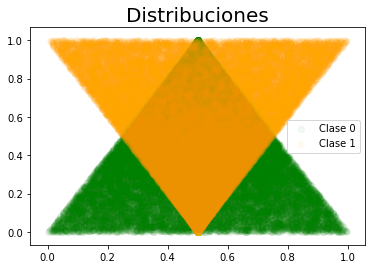

In [143]:
g = plt.scatter( clase0[:,0] , clase0[:,1] , alpha='0.05', color='green' , label = 'Clase 0');
g = plt.scatter( clase1[:,0] , clase1[:,1] , alpha='0.05', color='orange' , label = 'Clase 1');
plt.legend()
plt.title("Distribuciones", fontsize=20)

#### Para generar la particion tengo que saber la longitud del lado de la caja

In [134]:
h_n = n **(-(1/4)) 
# Esto viene de hacer n^(-(1/2d)) con d=2,
#que cumplia las condiciones para que la regla del histograma sea universalmente consistente.

d_n = int(1/h_n) #No 1/h_n es entero

In [135]:
particion = np.ndarray((d_n , d_n), dtype = int )
particion.fill(0)

In [136]:
for i in range(n):
    
    x_p , y_p = int(muestra[i,0]/h_n) , int(muestra[i,1]/h_n)
    
    x_p = d_n - 1 if x_p >=d_n else x_p
    y_p = d_n - 1 if y_p >=d_n else y_p
    
    particion[y_p , x_p] += 1 if muestra[i,2] else -1

In [138]:
f = lambda x : 1 if (x>= 0) else 0
f_vec = np.vectorize(f)
for_heatmap = f_vec(particion) #Mapeo todos los numeros a 0 o 1 

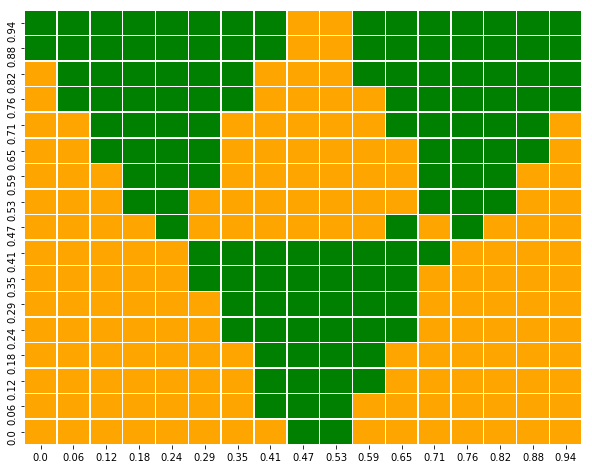

In [144]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
g = sns.heatmap(for_heatmap, linewidths=.5, cmap=['green','orange'] , cbar = False ,\
                xticklabels = [round(x/d_n,2) for x in range(d_n)]\
                ,yticklabels = [(round(1-x/d_n,2)) for x in range(1,d_n+1)])